<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Advertising Clickable</strong></h1>

### <b>Author: Nguyen Dang Huynh Chau</b>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Importing Necessary Libraries and datasets](#1.1)

1.2 [Data Retrieving](#1.2)

1.3 [Data information](#1.3)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Data Processing](#2.2)

> - 2.2.1 [Drop Column](#2.2.1) 
> - 2.2.2 [Convert length of stay to 0 and 1](#2.2.2)
> - 2.2.2 [Convert Unknown](#2.2.2)


2.3 [Check missing values](#2.3)

2.4 [Data type](#2.4)

2.5 [Upper Case the content](#2.5)

2.6 [Extra-whitespaces](#2.6)

2.7 [Descriptive statistics for Central Tendency](#2.7)

2.8 [Detect Outlier](#2.8)

2.9 [Save The Intermediate Data](#2.9)

<br>

### 3. [Data Exploration (EDA)](#3)

3.1 [Overall look on target variable](#3.1)

> - 3.1.1 [Distribution of Length Of Stay](#3.1.1) 
> - 3.1.2 [Distribution of Length Of Stay](#3.1.2) 

3.2 [Frequency of each corresponiding Target variable type](#3.2)

> - 3.2.1 [Medical Cost of both group stay more vs less than 3 days in Hospital](#3.2.1) 
> - 3.2.2 [Length of stay of each serverity of illness group](#3.2.2) 
> - 3.2.3 [Patient Gender Distribution - Stay less vs more than 3 days](#3.2.3) 
> - 3.2.4 [APR Severity Of Illness Code Distribution - Stay less vs more than 3 days](#3.2.4) 
> - 3.2.5 [Race Distribution - Stay less vs more than 3 days](#3.2.5) 
> - 3.2.6 [Severity of illness of each reaces](#3.2.6) 
> - 3.2.7 [Medical Cost of each Race in both group stay more vs less than 3 days in Hospital](#3.2.7) 
> - 3.2.8 [Medical Cost of each Severity of illness in both group stay more vs less than 3 days in Hospital](#3.2.8) 
> - 3.2.9 [Average hospitalization Cost Distribution Stay more vs less than 3 days](#3.2.9) 
> - 3.2.10 [Birth Weight Distribution - Stay more vs less than 3 days](#3.2.10) 
> - 3.2.11 [Average Charges In County Distribution - Stay more vs less than 3 days](#3.2.11) 
> - 3.2.12 [Average Cost In Facility Distribution - Stay more vs less than 3 days](#3.2.12) 
> - 3.2.13 [Average Charges In Facility Distribution - Stay more vs less than 3 days](#3.2.13) 
> - 3.2.14 [Factorplot of Average Charges In Facility Length Of Stay](#3.2.14) 


3.3 [Summary](#3.3)

<br>

### 4. [Statistic Overview](#4)

4.1 [Descriptive statistics for Variability](#4.1)

4.2 [Correlation Matrix and Heatmap](#4.2)

> - 4.2.1 [Correlation Matrix](#4.2.1)
> - 4.2.2 [Heat map](#4.2.2)

4.3 [Statistical Test for Correlation](#4.3)

<br>

### 5. [Feature Engineering](#5) 

5.1 [Encoding](#5.1)

5.2 [Separating dependent and independent variables](#5.2)

5.3 [Splitting the training data](#5.3)

5.4 [Feature Scaling](#5.4)

<br>

### 6. [Model Building](#6) 

5.1 [Logistic Regression](#5.1)

5.1 [Feature Scaling](#5.2)

5.1 [Feature Scaling](#5.3)

5.1 [Feature Scaling](#5.4)


<br>

### 7. [Conculsions](#7)

<br>

### 8. [References](#8)

<br>

### 9. [Appendix](#9)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ✴️ 1.1 Importing Necessary Libraries and datasets

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install imbalanced-learn
!{sys.executable} -m pip install category_encoders


# work with data in tabular representation
from datetime import time
import pandas as pd
# round the data in the correlation matrix
import numpy as np
import os


# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

  Using cached xgboost-1.5.2-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.3 MB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.0.2-cp39-cp39-macosx_10_13_x86_64.whl (8.0 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.20.3
Pandas version:  1.3.4
Python 3.9.7


<a id="1.2"></a>
# 📲 1.2 Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

In [4]:
## Importing the datasets
df = pd.read_csv("Data/advertising.csv", delimiter=',', skipinitialspace = True)

df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

# drop Unnamed, it is just a number given to identify each house
df.head(3)

The shape of the ORGINAL data is (row, column): (1000, 10)


,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,Timestamp,ClickedonAd
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


<a id="1.3"></a>
# 🔈 1.3 Data Information
****
In this part, I desire to look at the overall information for this dataset.


In [6]:
print ("The shape of the train data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the train data is (row, column):(1000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DailyTimeSpentonSite  1000 non-null   float64
 1   Age                   1000 non-null   int64  
 2   AreaIncome            1000 non-null   float64
 3   DailyInternetUsage    1000 non-null   float64
 4   AdTopicLine           1000 non-null   object 
 5   City                  1000 non-null   object 
 6   Male                  1000 non-null   int64  
 7   Country               1000 non-null   object 
 8   Timestamp             1000 non-null   object 
 9   ClickedonAd           1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB
None


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***

Now let's go through the features and describe a little:
***
**Categorical:** 
- **Nominal**(variables that have two or more categories, but which do not have an intrinsic order.)
   > - **AdTopicLine** (A description of advertising topic)
   > - **City** 
   > - **Country**
   
***
**Numeric:**
- **Discrete**
  >  - **Male**
- **Continous**
>  - **Age** 
>  - **DailyTimeSpentonSite** 
>  - **AreaIncome** 
>  - **DailyInternetUsage** 
>  - **ClickedonAd** 

***
**Date/time:**
> - **Timestamp**

<a id="2.3"></a>
# 📝 2.3 Typo check:
***
In order to check the typo, all the categories in all the columns with value_count() functions, by counting the typo mistake can appear. For those cloumns has a long values count list, they will be shown by using a for loop in order to check carefully. Each question for each columns all are listed below for catching up with those values in or to decide if the answer is valid or not.

In [9]:
categories = list(df['AdTopicLine'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Cloned 5thgeneration orchestration
Synchronized multi-tasking ability
Customer-focused impactful success
Open-source optimizing parallelism
Organic logistical adapter
Stand-alone eco-centric system engine
User-centric intermediate knowledge user
Programmable didactic capacity
Enhanced regional conglomeration
Total asynchronous architecture
Secured upward-trending benchmark
Customizable value-added project
Integrated interactive support
Reactive impactful challenge
Switchable multi-state success
Fundamental clear-thinking knowledgebase
Front-line multi-state hub
Multi-layered user-facing parallelism
Front-line incremental access
Open-architected zero administration secured line
Mandatory disintermediate info-mediaries
Implemented context-sensitive Local Area Network
Digitized interactive initiative
Implemented asynchronous application
Focused multi-state workforce
Proactive secondary monitoring
Front-line upward-trending groupware
Quality-focused 5thgeneration orchestration
Multi-layere

In [10]:
categories = list(df['City'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

Lisamouth
Williamsport
Wrightburgh
Lake Jose
Robertfurt
New Sheila
Lake Susan
New Jessicaport
Benjaminchester
Lake James
Michelleside
East John
West Steven
Joneston
Johnstad
Port Julie
North Daniel
Port Juan
Lake Patrick
Millerbury
Shelbyport
West Amanda
Port Jason
Lake David
West Shannon
East Timothy
Millertown
South Lisa
Pamelamouth
Port James
Jeremybury
Luisfurt
New Karenberg
West Leahton
Kingshire
West Sharon
Klineside
Lake Cynthia
South Cynthiashire
Lake Jacob
West Samantha
Meyerchester
Blevinstown
Blairville
Reginamouth
Donaldshire
Salazarbury
Lake Joshuafurt
Wintersfort
Jamesmouth
Laurieside
Andrewmouth
West Angela
East Carlos
Perezland
Sanderstown
Port Georgebury
South Margaret
Brownbury
Rebeccamouth
Port Davidland
Isaacborough
Lake Michael
West Michaelshire
Port Calvintown
Parkerhaven
Markhaven
Estradashire
Brianland
Cassandratown
West Dannyberg
East Debraborough
Frankchester
Lisafort
Colemanshire
Troyville
Hobbsbury
Harrisonmouth
Port Eugeneport
Karenmouth
Brendaburgh
New Chr

In [11]:
categories = list(df['Country'].value_counts().index)

for x in range(len(categories)):
    print (categories[x])

France
Czech Republic
Peru
Turkey
Greece
Senegal
Liberia
Australia
South Africa
Micronesia
Cyprus
Afghanistan
Taiwan
Cambodia
Luxembourg
Eritrea
Fiji
Burundi
Venezuela
Bahamas
Ethiopia
Western Sahara
Albania
Bosnia and Herzegovina
Croatia
Svalbard & Jan Mayen Islands
Saint Vincent and the Grenadines
Singapore
Bulgaria
Christmas Island
United Arab Emirates
Gabon
Anguilla
Lebanon
Madagascar
Moldova
Puerto Rico
Jersey
Samoa
Hungary
Turkmenistan
Hong Kong
Bolivia
Liechtenstein
Costa Rica
Malta
Philippines
Algeria
Indonesia
Netherlands Antilles
Qatar
Mongolia
Belarus
Zimbabwe
Kyrgyz Republic
Mayotte
China
El Salvador
Poland
Vanuatu
Mexico
French Southern Territories
Serbia
Jamaica
Ecuador
Bahrain
Finland
Guyana
Saint Pierre and Miquelon
Somalia
Papua New Guinea
Brunei Darussalam
Pakistan
Belize
Cuba
Antigua and Barbuda
Brazil
Ukraine
Canada
Italy
Uruguay
Myanmar
Cayman Islands
Egypt
Barbados
French Polynesia
Cameroon
Korea
Bouvet Island (Bouvetoya)
Dominica
Saint Helena
Iran
Austria
Rwanda


<a id="2.4"></a>
# 📚 2.4 Missing values
Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

Missing values in the dataframe in descending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


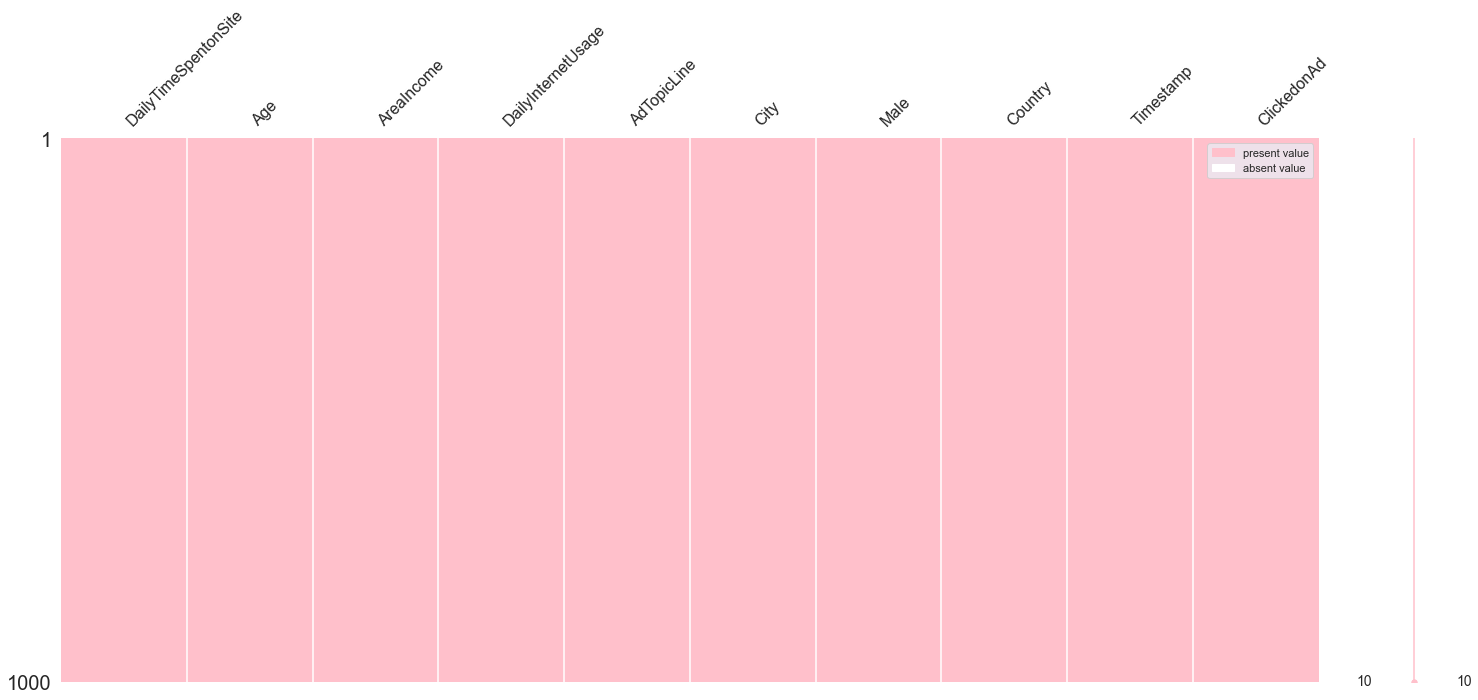

In [12]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION
*****
There is no missing value.

<a id="2.5"></a>
# 🦄 2.5 Data type
***

In [15]:
df['AdTopicLine'] = df['AdTopicLine'].astype('string')
df['City'] = df['City'].astype('string')
df['Country'] = df['Country'].astype('string')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

<a id="2.6"></a>
# 💭 2.6 Upper Case the content
In this section we will convert all the string value in the column to uppercase for further processing and keep all the string uniformly format. This will improve the analysis of the data, and also easier to perform any function related to the string. 

In [16]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
df = df.applymap(lambda s: s.upper() if type(s) == str else s)
df.head(3)

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,Timestamp,ClickedonAd
0,68.95,35,61833.90,256.09,CLONED 5THGENERATION ORCHESTRATION,WRIGHTBURGH,0,TUNISIA,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,MONITORED NATIONAL STANDARDIZATION,WEST JODI,1,NAURU,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,ORGANIC BOTTOM-LINE SERVICE-DESK,DAVIDTON,0,SAN MARINO,2016-03-13 20:35:42,0


<a id="2.7"></a>
# 📚 2.7 Extra-whitespaces:
***
There are some time maybe an extra-whitespaces in the database, which results in comparison failures, NaN Value, and greater size. First of all, extra-whitespaces cause string with and without it to not be the same. For instance, "ABC" != " ABC", these two strings are not equal, and that mistake cannot be noticed straightforwardly since the difference is inconsiderable. Nevertheless, the computer cannot understand that mistake. Secondly, the extra-whitespaces can be record as NaN values in pandas, which results in unexpected result. Last but not least, the whitespaces can increase the size of the database so that they can overflow the limited size. So that data should be checked with extra-whitespaces carefully.

In [ ]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

# remove all the extra whitespace
whitespace_remover(df)


<a id="2.8"></a>
# 📊 2.8 Descriptive statistics for Central Tendency

In [17]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DailyTimeSpentonSite,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
AreaIncome,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
DailyInternetUsage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
ClickedonAd,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


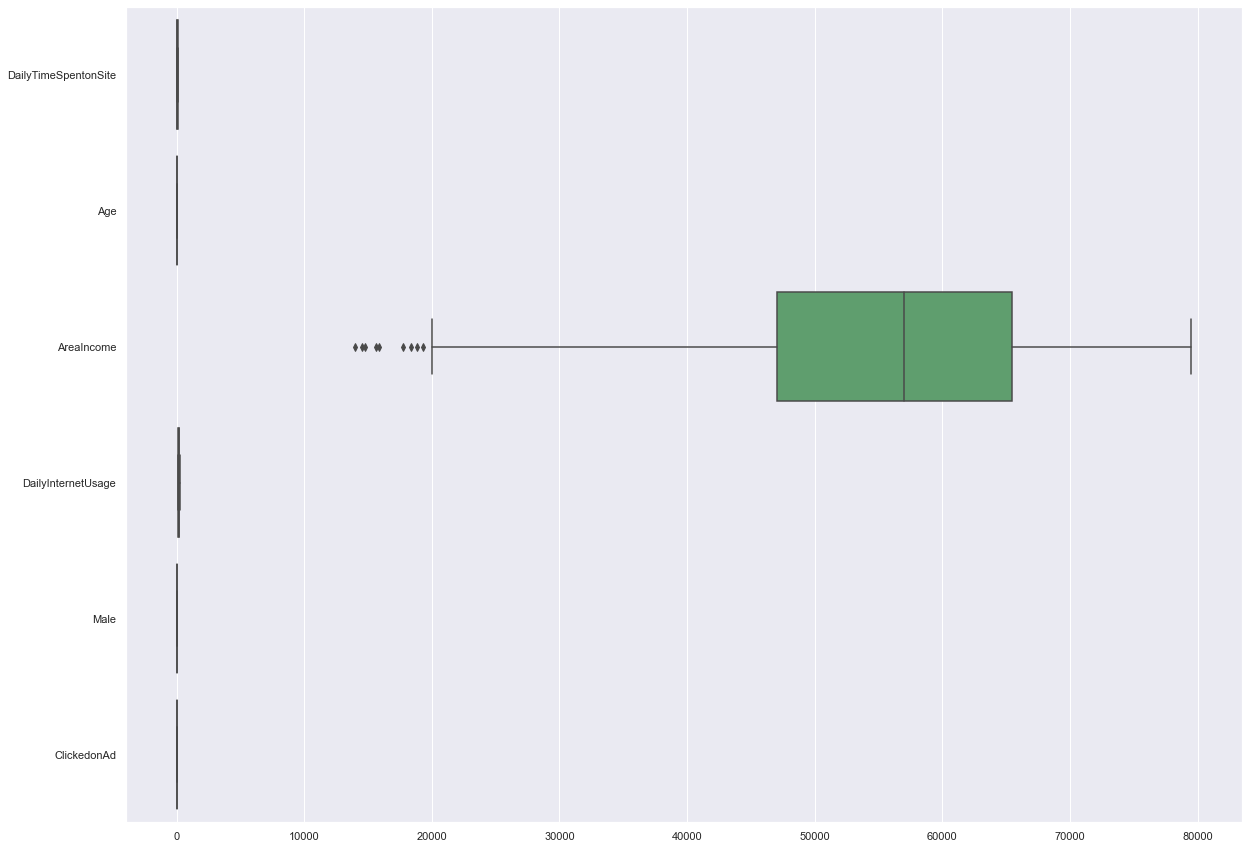

In [20]:
plt.rcParams['figure.figsize'] = [20, 15]
# plot the boxplot to see the outlier of each numerical column
sns.boxplot(data=df,orient="h")

### ---------> OBSERVATION
> According to this plot, the `AreaIncome` has a large range. Since then, I would like to look at it.

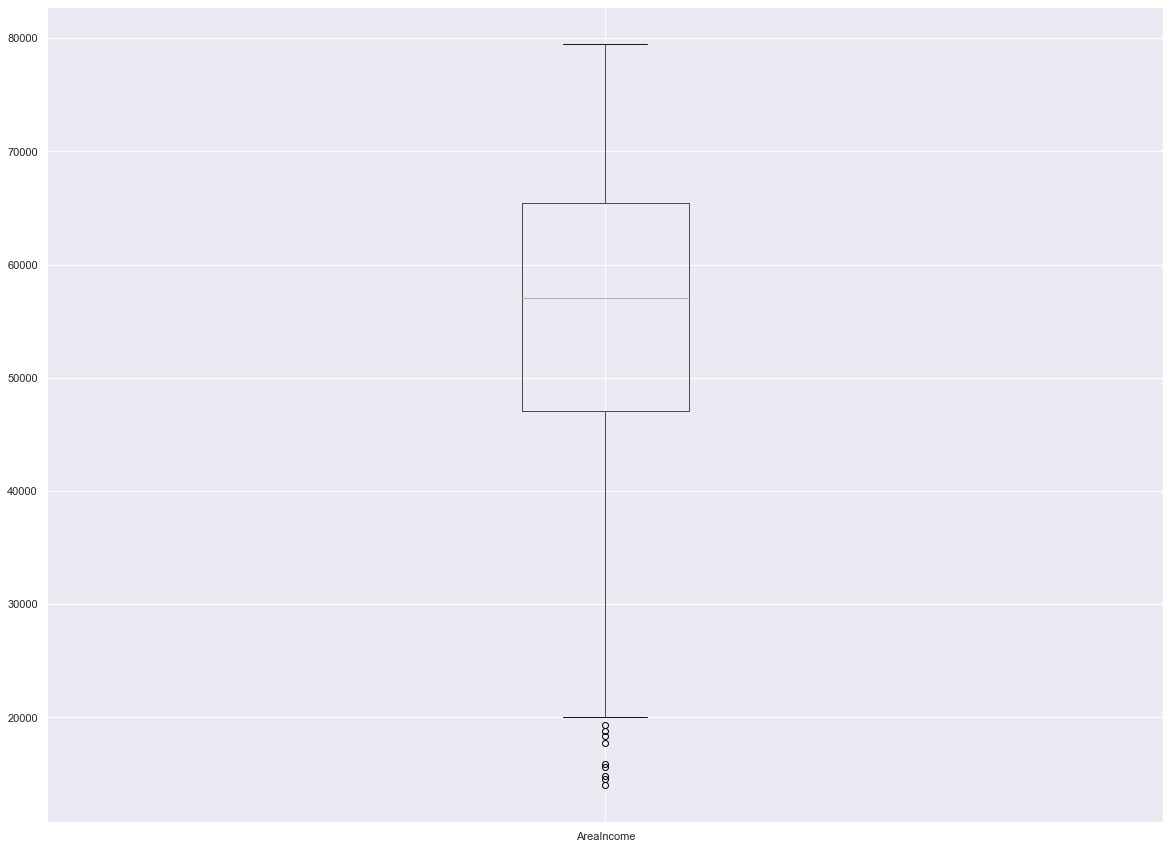

In [21]:
df.boxplot('AreaIncome');

In [22]:
q_low = df["AreaIncome"].quantile(0.01)
q_hi  = df["AreaIncome"].quantile(0.99)

df_filtered = df[(df["AreaIncome"] > q_hi)]
df_filtered

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,AdTopicLine,City,Male,Country,Timestamp,ClickedonAd
144,69.08,41,77460.07,210.60,ERGONOMIC CLIENT-DRIVEN APPLICATION,KIMBERLYHAVEN,0,TURKS AND CAICOS ISLANDS,2016-03-12 01:39:19,0
200,66.40,40,77567.85,214.42,DIGITIZED HEURISTIC SOLUTION,PORT DESTINY,0,ANTIGUA AND BARBUDA,2016-06-05 00:29:13,0
273,68.88,37,78119.50,179.58,ADVANCED 5THGENERATION CAPABILITY,PORT WHITNEYHAVEN,0,BELGIUM,2016-02-09 19:37:52,0
419,60.70,43,79332.33,192.60,MULTI-TIERED MULTI-STATE MODERATOR,MATABERG,1,PALAU,2016-06-06 22:41:24,0
525,66.14,41,78092.95,165.27,RE-ENGINEERED IMPACTFUL SOFTWARE,NORTH ISABELLAVILLE,0,WESTERN SAHARA,2016-03-23 08:52:31,0
563,62.26,37,77988.71,166.19,VISION-ORIENTED UNIFORM KNOWLEDGEBASE,WEST ROBERTSIDE,0,MALAWI,2016-05-26 15:40:12,0
568,64.51,42,79484.80,190.71,VIRTUAL 5THGENERATION NEURAL-NET,EDWARDMOUTH,1,MADAGASCAR,2016-04-29 07:49:01,0
780,67.85,41,78520.99,202.70,REACTIVE TANGIBLE CONTINGENCY,EAST RONALD,1,SAINT HELENA,2016-01-21 22:51:34,1
798,66.83,46,77871.75,196.17,ASSIMILATED HYBRID INITIATIVE,NORTH JEREMYPORT,1,CYPRUS,2016-02-28 23:10:32,0
877,68.68,34,77220.42,187.03,SHARABLE ENCOMPASSING DATABASE,LAKE JENNIFERTON,1,EQUATORIAL GUINEA,2016-07-15 09:42:19,0
